### 基数排序

算法实现原理：先排元素的最后一位，再排倒数第二位，直到所有位数都排完。

![avatar](./00_img/radixSort.gif)

代码实现

In [11]:
def radix_sort(arr):
    count = 1  # 定义计步器
    index = 0  # 定义arr中最开始的索引位置
    max_num = max(arr)  # 获取arr中最大值
    max_num_len = len(str(max_num))  # 获取最大值的位数
    
    while index < max_num_len:  # 开始循环比较， 当前我们的数组仅仅有两个值，所以仅仅需要循环两次即可
        
        bucket_list = [ [] for _ in range(10)]  # 初始化一个桶数组
        
        for x in arr:  # 遍历 arr数组
            temp = (x // 10 ** index) % 10  # 获取当前元素的在桶中的位置
            bucket_list[temp].append(x)  # 将当前元素放入到桶中
        
        print(f"第{count}步 ===> bucket_list = {bucket_list}")  

        arr.clear()  # 清除原arr数组
        
        for x in bucket_list:  # 将桶中的数据放回原数组中
            for y in x:
                arr.append(y)
        print(f"第{count}步 ===> arr = {arr}")  
        
        count += 1  # 计步器加一
        
        index += 1  # 最开始索引向后移动
    
    return arr

if __name__ == "__main__":
    arr = [3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
    print(f"排序前：{arr}")
    new_arr = radix_sort(arr)
    print(f"排序后：{new_arr}")

排序前：[3, 44, 38, 5, 47, 15, 36, 26, 27, 2, 46, 4, 19, 50, 48]
第1步 ===> bucket_list = [[50], [], [2], [3], [44, 4], [5, 15], [36, 26, 46], [47, 27], [38, 48], [19]]
第1步 ===> arr = [50, 2, 3, 44, 4, 5, 15, 36, 26, 46, 47, 27, 38, 48, 19]
第2步 ===> bucket_list = [[2, 3, 4, 5], [15, 19], [26, 27], [36, 38], [44, 46, 47, 48], [50], [], [], [], []]
第2步 ===> arr = [2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]
排序后：[2, 3, 4, 5, 15, 19, 26, 27, 36, 38, 44, 46, 47, 48, 50]


----

### 解析mnist数据集

什么是mnist数据集？

官方地址：http://yann.lecun.com/exdb/mnist/

mnist是一个手写数字图片数据集：这个数据集中包含$60000$个训练样本和$10000$个测试样本

手写数字图片：样例

![avatar](./00_img/mnist.png)

这个数据集的意义：使用深度学习模型训练手写数字识别，如同使用python打印hello world！

数据集样式

![avatar](./00_img/mnist2.png)

- train : labels images
- test : labels images

解析标签

![avatar](./00_img/mnist3.png)

字节的概念(了解)

----

大端模式（big-endian）与小端模式（little-endian）【了解】

大端模式是指数据的低位保存在内存的高地址中，而数据的高位保存在内存的低地址中.

小端模式是指数据的低位保存在内存的低地址中，而数据的高位保存在内存的高地址中。

### 假设从地址 0x4000开始存放

### 16bit=2Byte

#### 小端模式：
- 内存地址：
    - 0x4000
    - 0x4001
- 存放内容：
    - 0x34
    - 0x12
#### 大端模式：
- 内存地址:
    - 0x4000
    - 0x4001
- 存放内容:
    - 0x12
    - 0x34

### 32bit = 4Byte

- 小端模式:
    - 内存地址
        - 0x4000
        - 0x4001
        - 0x4002
        - 0x4003
    - 存放内容
        - 0x78
        - 0x56
        - 0x34
        - 0x12
        
- 大端模式:
    - 内存地址
        - 0x4000
        - 0x4001
        - 0x4002
        - 0x4003
    - 存放内容
        - 0x12
        - 0x34
        - 0x56
        - 0x78

----

处理标签文件

In [38]:
with open("./data/MNIST/raw/t10k-labels-idx1-ubyte", "rb") as f:
    data = f.read()

In [39]:
data[:4]

b'\x00\x00\x08\x01'

In [40]:
import struct

struct.unpack(">i", data[:4])[0]

2049

In [41]:
struct.unpack(">i", data[4:8])[0]

10000

In [42]:
magic_number, items_number = struct.unpack(">ii", data[0:8])
magic_number, items_number

(2049, 10000)

In [43]:
import numpy as np

In [44]:
np.asarray(bytearray(data[8:]), dtype="int")

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
np.asarray(bytearray(data[8:]), dtype="int").shape

(10000,)

In [46]:
def load_labels(file_name):
    with open(file_name, "rb") as f:
        labels = f.read()
    magic_number, items_number = struct.unpack(">ii", data[0:8])
    print(file_name)
    print(magic_number)
    if magic_number != 2049:
        raise TypeError("File is not label file.")
    return np.asarray(bytearray(data[8:]), dtype="int")

解析图片

![avatar](./00_img/mnist4.png)

In [47]:
with open("data/MNIST/raw/t10k-images-idx3-ubyte", "rb") as  f:
    images = f.read()
    
magic_number, image_number, rows_number, col_number = struct.unpack(">iiii", images[:16])
magic_number, image_number, rows_number, col_number

(2051, 10000, 28, 28)

In [3]:
# import struct
# help(struct)

In [48]:
pixel = images[16:]
len(pixel)

7840000

In [49]:
image = pixel[:rows_number*col_number]

np.asarray(bytearray(image), dtype=np.uint8).shape

(784,)

In [50]:
image = pixel[rows_number*col_number:2*rows_number*col_number]

np.asarray(bytearray(image), dtype=np.uint8).shape

(784,)

In [51]:
pimage = np.asarray(bytearray(image), dtype=np.uint8).reshape(28, 28)

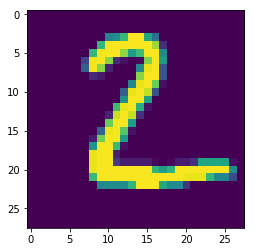

In [52]:
import matplotlib.pyplot as plt

plt.imshow(pimage)

In [53]:
def load_image(file_name):
    with open(file_name, "rb") as  f:
        images = f.read()
    
    magic_number, image_number, rows_number, col_number = struct.unpack(">iiii", images[:16])
    if magic_number != 2051:
        raise TypeError("File is not image file.")
    return np.asarray(bytearray(images[16:]), dtype=np.uint8).reshape(image_number, -1)

In [54]:
load_image("data/MNIST/raw/t10k-images-idx3-ubyte").shape

(10000, 784)

In [55]:
# load_image("data/MNIST/raw/t10k-labels-idx1-ubyte").shape

In [16]:
import struct
import numpy as np
import matplotlib.pyplot as plt

class DataSet:
    
    def __init__(self, label_path, image_path, index):
        self.label_path = label_path
        self.image_path = image_path
        self.index = index
    
    def load_labels(self):
        with open(self.label_path, "rb") as f:
            labels = f.read()
        magic_number, items_number = struct.unpack(">ii", labels[0:8])
        if magic_number != 2049:
            raise TypeError("File is not label file.")
        return np.asarray(bytearray(labels[8:]), dtype="int")[self.index]
        
    def load_image(self):
        with open(self.image_path, "rb") as  f:
            images = f.read()

        magic_number, image_number, rows_number, col_number = struct.unpack(">iiii", images[:16])
        if magic_number != 2051:
            raise TypeError("File is not image file.")
        return np.asarray(bytearray(images[16:]), dtype=np.uint8).reshape(image_number, -1)[self.index].reshape(28, 28)

9


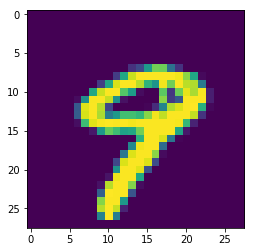

In [17]:
image_path = "data/MNIST/raw/t10k-images-idx3-ubyte"
label_path = "./data/MNIST/raw/t10k-labels-idx1-ubyte"
data = DataSet(label_path, image_path, 9)
label = data.load_labels()
print(label)
image = data.load_image()
plt.imshow(image)